In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dropout




import warnings
warnings.filterwarnings('ignore')


In [83]:
data= pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [85]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


## Clean Data

In [86]:
data[data.duplicated()]


,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [87]:
data = data.drop_duplicates()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## EDA

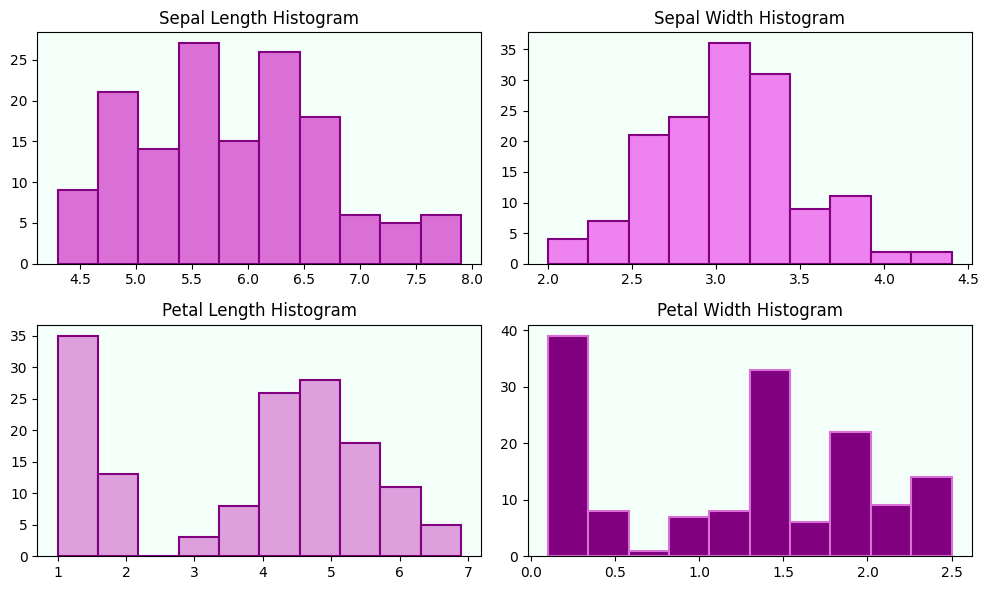

In [88]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0,0].hist(data['sepal_length'], color='orchid', edgecolor='purple' ,linewidth=1.5)
axs[0,0].set_title("Sepal Length Histogram")
axs[0,0].set_facecolor('mintcream')

axs[0,1].hist(data['sepal_width'], color='violet', edgecolor='purple'  ,linewidth=1.5)
axs[0,1].set_title("Sepal Width Histogram")
axs[0,1].set_facecolor('mintcream')


axs[1,0].hist(data['petal_length'], color='plum', edgecolor='purple',linewidth=1.5)
axs[1,0].set_title("Petal Length Histogram")
axs[1,0].set_facecolor('mintcream')


axs[1,1].hist(data['petal_width'], color='purple', edgecolor='orchid',linewidth=1.5)
axs[1,1].set_title("Petal Width Histogram")
axs[1,1].set_facecolor('mintcream')


plt.tight_layout()
plt.show()


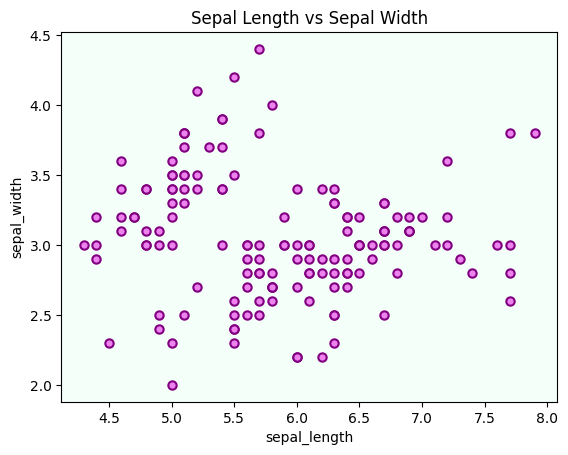

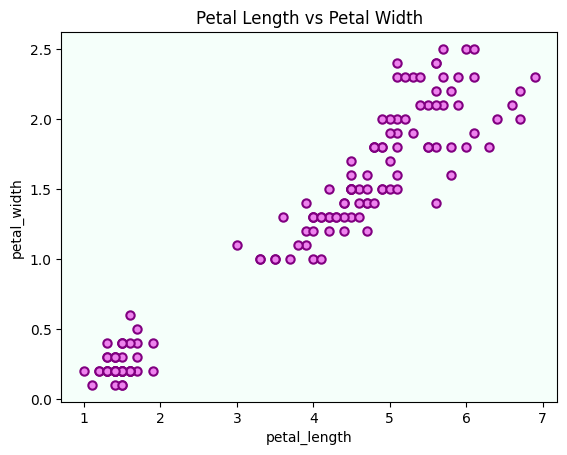

In [89]:
plt.figure()
plt.scatter(data['sepal_length'], data['sepal_width'], color='violet', edgecolor='purple', linewidths=1.5)
plt.gca().set_facecolor('mintcream')
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("Sepal Length vs Sepal Width")

plt.show()

plt.figure()
plt.scatter(data['petal_length'], data['petal_width'], color='violet', edgecolor='purple', linewidths=1.5)
plt.gca().set_facecolor('mintcream')
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.title("Petal Length vs Petal Width")
plt.show()

## Data Preprocessing 

In [90]:
data['species'] = data['species'].str.replace('Iris-', '', regex=False)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [91]:
# Encode species column (text → numbers)
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

# Scale numeric features
scaler = StandardScaler()
num_cols = ['sepal_length','sepal_width','petal_length','petal_width']
data[num_cols] = scaler.fit_transform(data[num_cols])

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.915509,1.019971,-1.357737,-1.335700,0
1,-1.157560,-0.128082,-1.357737,-1.335700,0
2,-1.399610,0.331139,-1.414778,-1.335700,0
3,-1.520635,0.101529,-1.300696,-1.335700,0
4,-1.036535,1.249582,-1.357737,-1.335700,0
...,...,...,...,...,...
145,1.020892,-0.128082,0.809831,1.444682,2
146,0.536792,-1.276136,0.695748,0.915085,2
147,0.778842,-0.128082,0.809831,1.047484,2
148,0.415766,0.790361,0.923913,1.444682,2


In [92]:
print(list(le.classes_))
# ['setosa', 'versicolor', 'virginica']
# 0, 1 ,2

['setosa', 'versicolor', 'virginica']


## Feature Engineering

new feature	meaning

petal_area	petal_length × petal_width


sepal_area	sepal_length × sepal_width


petal_ratio	petal_length / petal_width


sepal_ratio	sepal_length / sepal_width

In [93]:
# Feature Engineering
data['petal_area'] = data['petal_length'] * data['petal_width']
data['sepal_area']  = data['sepal_length'] * data['sepal_width']
data['petal_ratio'] = data['petal_length'] / data['petal_width']
data['sepal_ratio'] = data['sepal_length'] / data['sepal_width']
data

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area,petal_ratio,sepal_ratio
0,-0.915509,1.019971,-1.357737,-1.335700,0,1.813529,-0.933793,1.016498,-0.897583
1,-1.157560,-0.128082,-1.357737,-1.335700,0,1.813529,0.148263,1.016498,9.037633
2,-1.399610,0.331139,-1.414778,-1.335700,0,1.889719,-0.463466,1.059204,-4.226650
3,-1.520635,0.101529,-1.300696,-1.335700,0,1.737339,-0.154388,0.973793,-14.977412
4,-1.036535,1.249582,-1.357737,-1.335700,0,1.813529,-1.295235,1.016498,-0.829505
...,...,...,...,...,...,...,...,...,...
145,1.020892,-0.128082,0.809831,1.444682,2,1.169947,-0.130758,0.560560,-7.970601
146,0.536792,-1.276136,0.695748,0.915085,2,0.636669,-0.685019,0.760310,-0.420638
147,0.778842,-0.128082,0.809831,1.047484,2,0.848285,-0.099756,0.773120,-6.080797
148,0.415766,0.790361,0.923913,1.444682,2,1.334760,0.328605,0.639527,0.526046


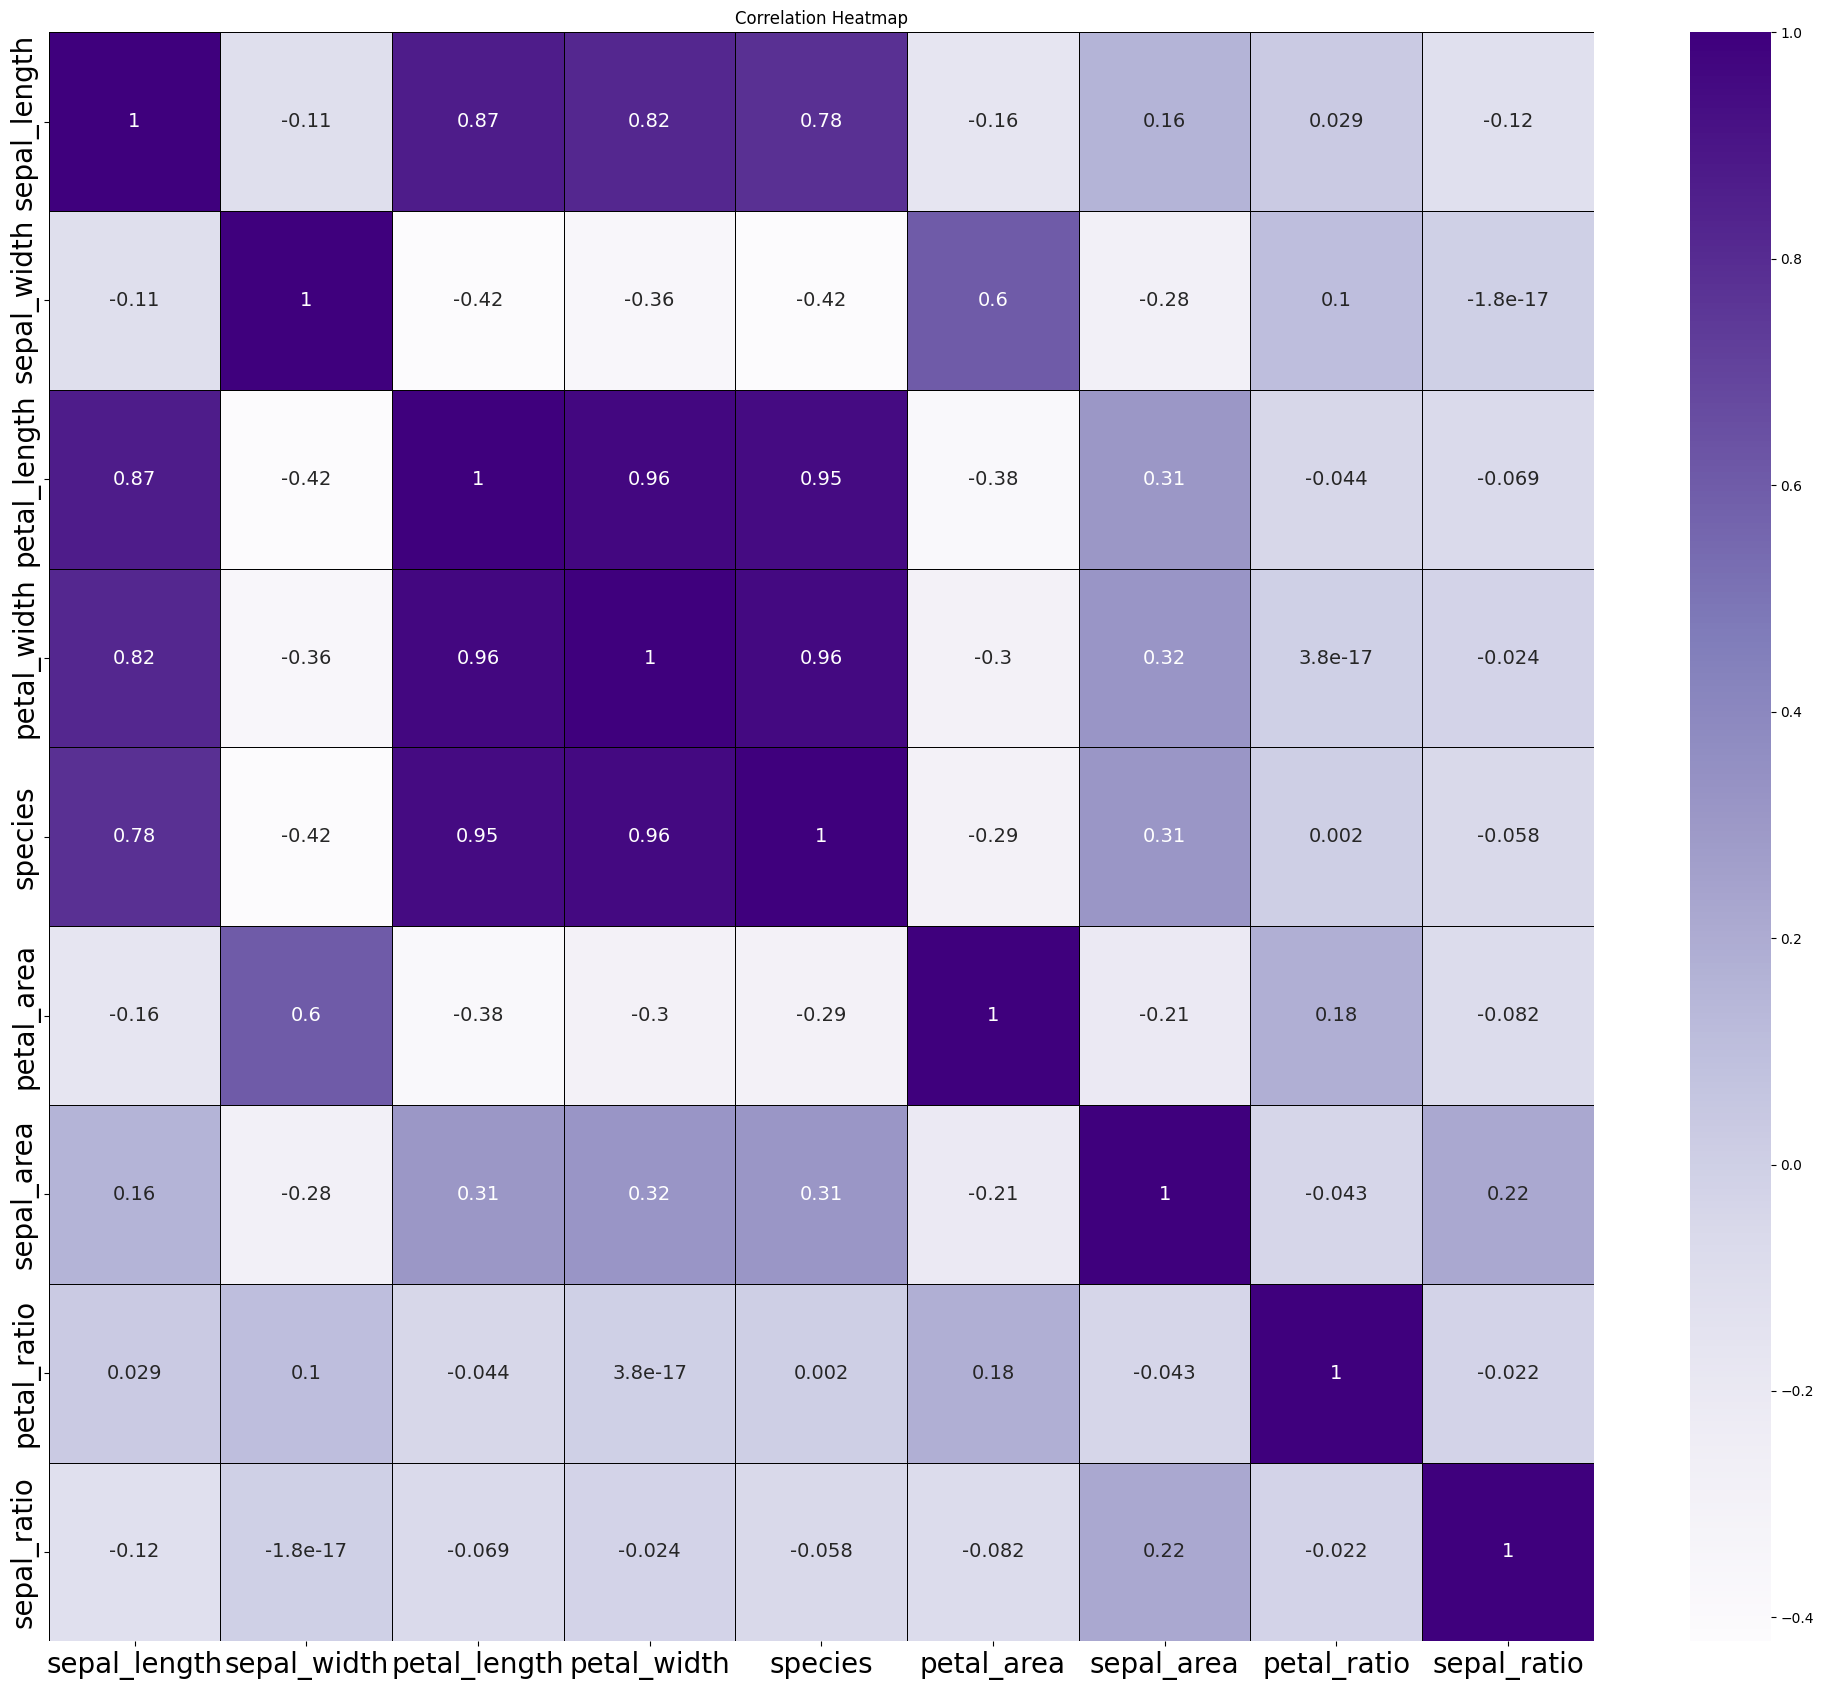

In [94]:

import seaborn as sns

corr = data.select_dtypes(include=['int64','float64']).corr()

plt.figure(figsize=(20,17))
sns.heatmap(
    corr,
    annot=True,
    cmap='Purples',       
    linewidths=0.5,
    linecolor='black',  annot_kws={"size":14}
)

plt.tick_params(axis='both', labelsize=20)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [95]:
# sepal_length
# sepal_width	petal_length	petal_width		petal_area	sepal_area

data = data.drop(['petal_ratio','sepal_ratio'], axis=1)
data

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
0,-0.915509,1.019971,-1.357737,-1.335700,0,1.813529,-0.933793
1,-1.157560,-0.128082,-1.357737,-1.335700,0,1.813529,0.148263
2,-1.399610,0.331139,-1.414778,-1.335700,0,1.889719,-0.463466
3,-1.520635,0.101529,-1.300696,-1.335700,0,1.737339,-0.154388
4,-1.036535,1.249582,-1.357737,-1.335700,0,1.813529,-1.295235
...,...,...,...,...,...,...,...
145,1.020892,-0.128082,0.809831,1.444682,2,1.169947,-0.130758
146,0.536792,-1.276136,0.695748,0.915085,2,0.636669,-0.685019
147,0.778842,-0.128082,0.809831,1.047484,2,0.848285,-0.099756
148,0.415766,0.790361,0.923913,1.444682,2,1.334760,0.328605


In [96]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
0,-0.915509,1.019971,-1.357737,-1.335700,0,1.813529,-0.933793
1,-1.157560,-0.128082,-1.357737,-1.335700,0,1.813529,0.148263
2,-1.399610,0.331139,-1.414778,-1.335700,0,1.889719,-0.463466
3,-1.520635,0.101529,-1.300696,-1.335700,0,1.737339,-0.154388
4,-1.036535,1.249582,-1.357737,-1.335700,0,1.813529,-1.295235
...,...,...,...,...,...,...,...
145,1.020892,-0.128082,0.809831,1.444682,2,1.169947,-0.130758
146,0.536792,-1.276136,0.695748,0.915085,2,0.636669,-0.685019
147,0.778842,-0.128082,0.809831,1.047484,2,0.848285,-0.099756
148,0.415766,0.790361,0.923913,1.444682,2,1.334760,0.328605


## Build Model

In [97]:
X = data.drop('species', axis=1)   # all features
y = data['species']                # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [104]:


# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax')
)

model.summary()


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history =model.fit(X_train, y_train, epochs=70, batch_size=16, validation_split=0.2, verbose=0)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)   

# Print the evaluation results
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}")
print(classification_report(y_test, y_pred))

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,107 (12.14 KB)

 Trainable params: 3,107 (12.14 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Accuracy: 96.66666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



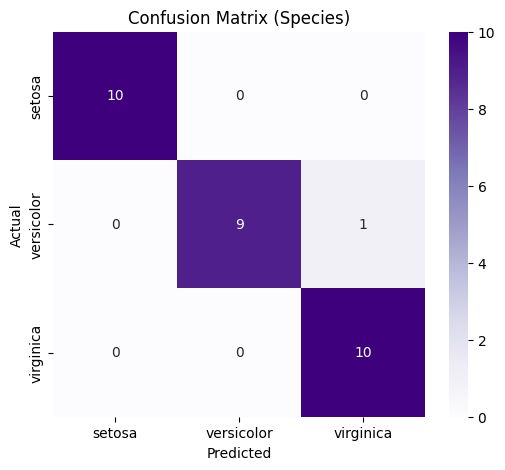

In [105]:


# class names
class_names = list(le.classes_)   

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Purples',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Species)")
plt.show()


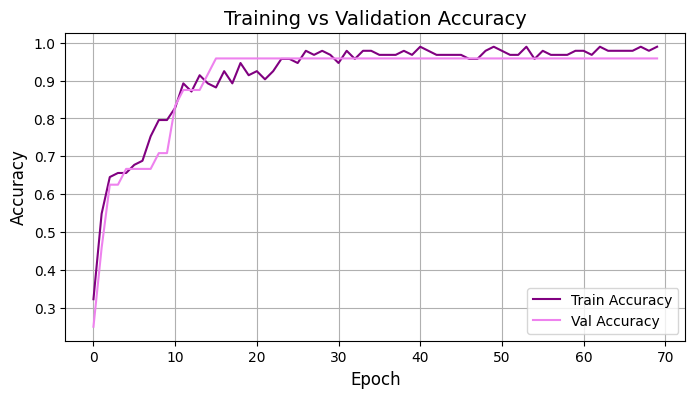

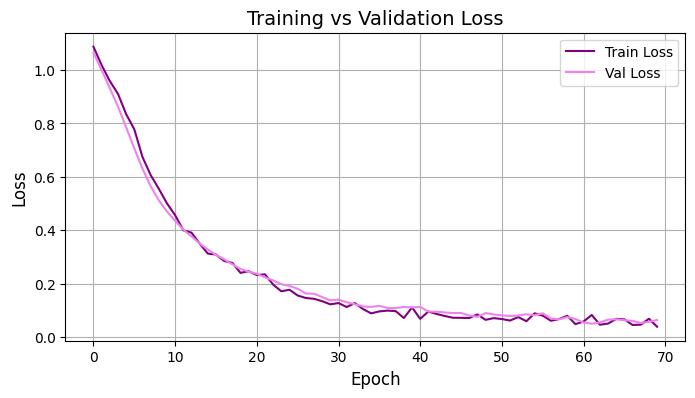

In [106]:
# ---- Accuracy plot ----
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='purple')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='violet')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training vs Validation Accuracy', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# ---- Loss plot ----
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss', color='purple')
plt.plot(history.history['val_loss'], label='Val Loss', color='violet')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training vs Validation Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()